# Introduction

**Author: Samanyu**<br>
**Language: Python**<br>
**Accelerator: None**<br><br>
**OS: Windows 11 Home Single Language 64-bit**<br>
**CPU: Intel Core i7-10750H @ 2.60GHz**<br>
**RAM: 16.0GB DDR4 @ 1464MHz**<br>
**Graphics: NVIDIA GeForce GTX 1650 (4GB)**<br>



In [1]:
# importing

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Reading and Displaying Train and Test data

In [2]:
df=pd.read_csv(r"C:\Users\Samanyu K\Downloads\Student_Performance.csv")

In [3]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# Data Preprocessing

In [4]:
df.columns=df.columns.str.strip()

In [5]:
# finding any null values
print(df.isnull().any())

Hours Studied                       False
Previous Scores                     False
Extracurricular Activities          False
Sleep Hours                         False
Sample Question Papers Practiced    False
Performance Index                   False
dtype: bool


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
# Let us look at the distribution of our features and target variable
num_cols=[col for col in df.columns if df[col].dtype!='object']
cat_cols=[col for col in df.columns if col not in num_cols]
print(num_cols,cat_cols)

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'] ['Extracurricular Activities']


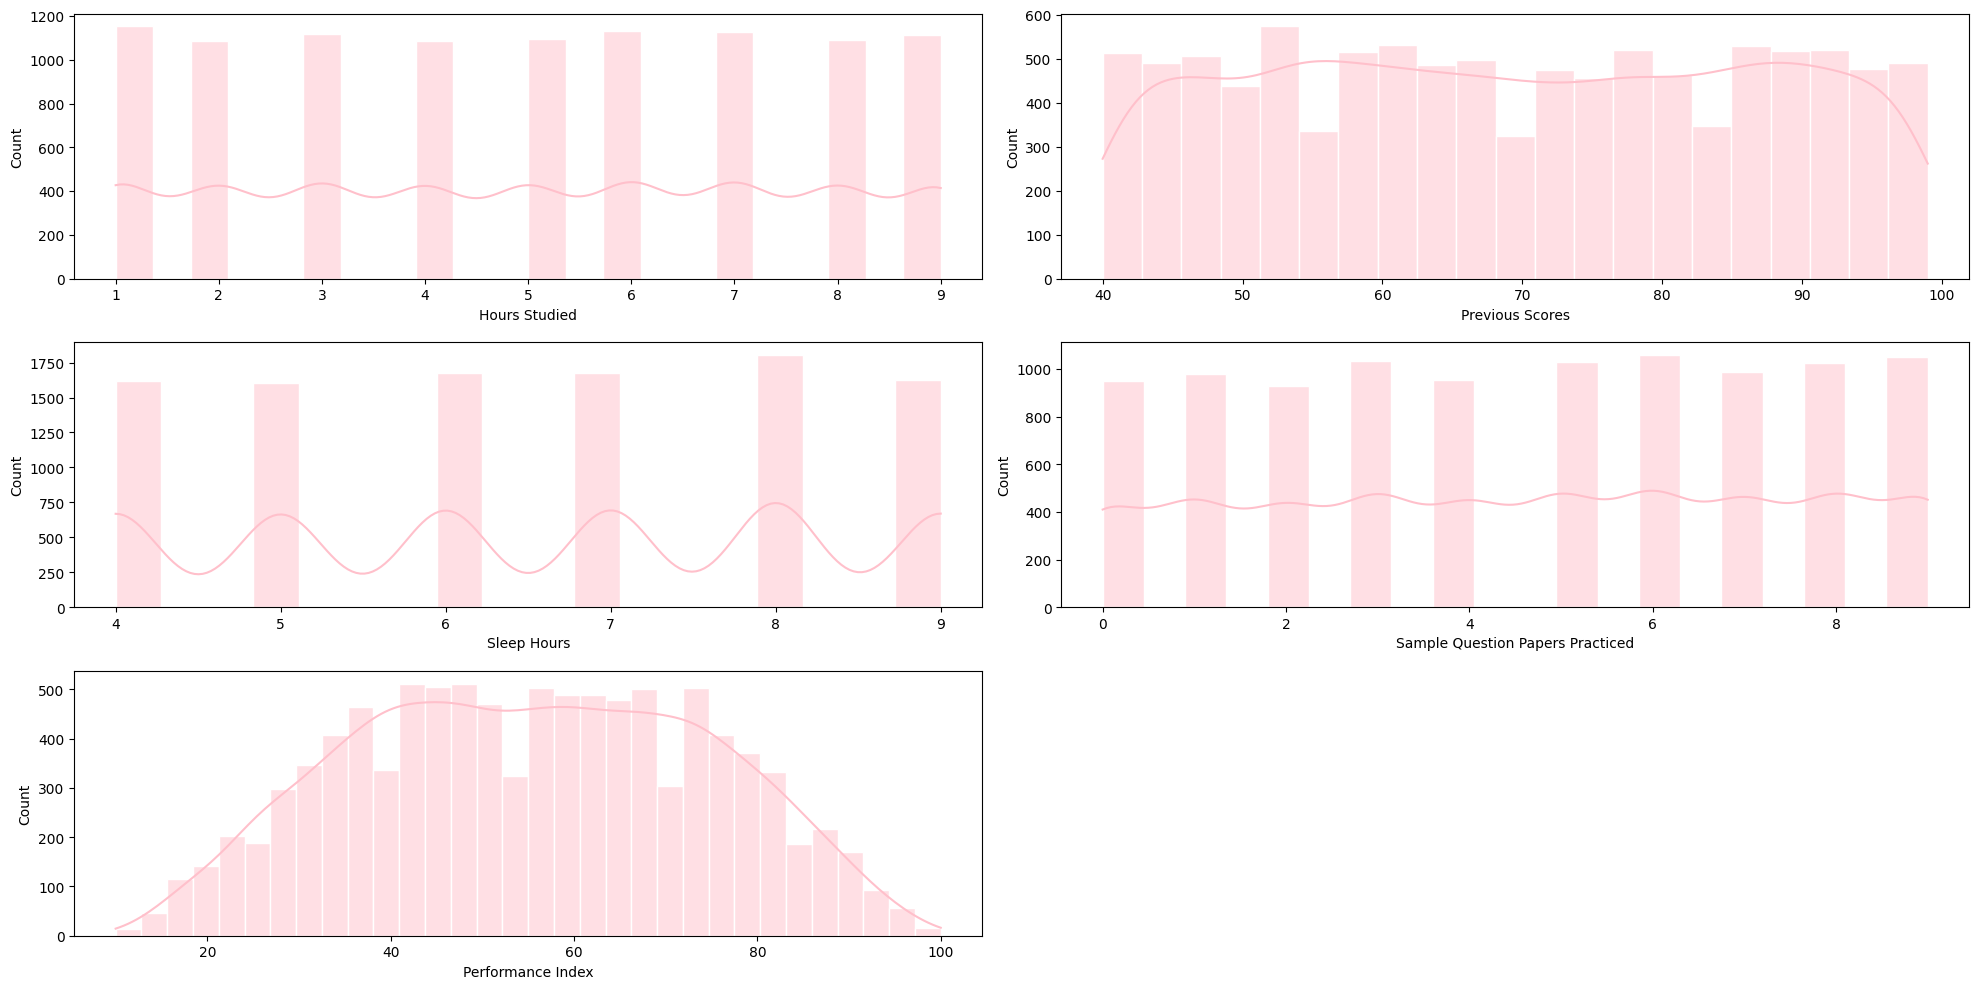

In [8]:
fig,ax=plt.subplots(3,2,figsize=(20,10))
ax=ax.flatten()
i=0
plt.style.use('dark_background')
for col in num_cols:
    sns.histplot(data=df,x=col,fill=True,ax=ax[i],kde=True,color='pink')
    i+=1
plt.tight_layout()
ax[5].axis('off')
plt.show()

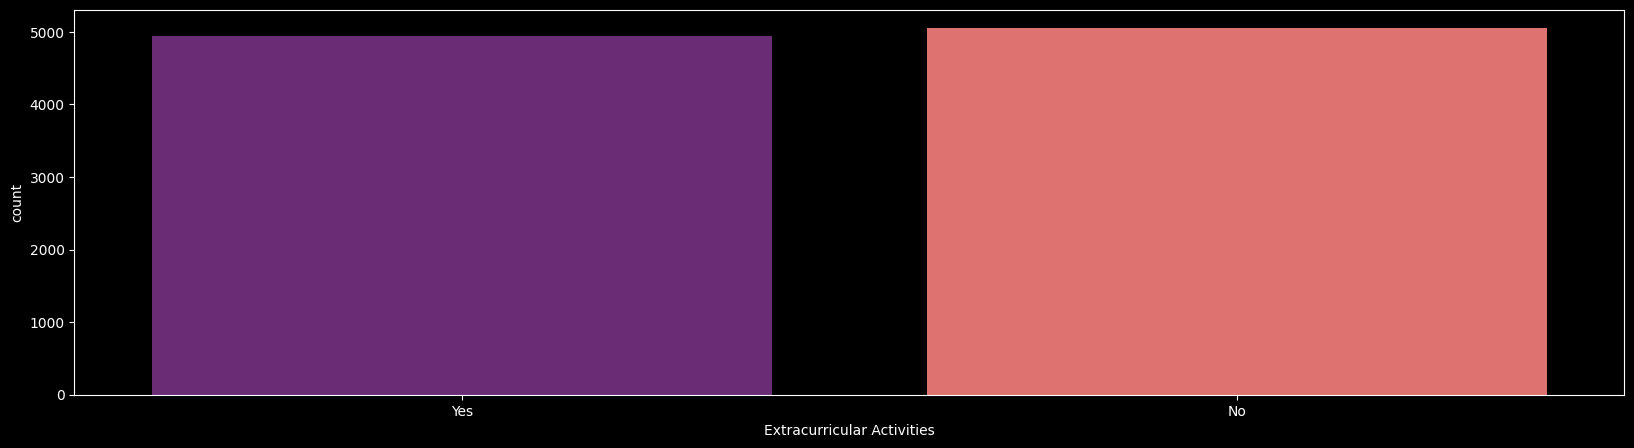

In [9]:
for col in cat_cols:
    plt.figure(figsize=(20,5))
    sns.countplot(data=df,x=col,hue=col,palette='magma')
    plt.show()

In [10]:
df['Extracurricular Activities']=df['Extracurricular Activities'].apply(lambda x: 1 if x=='Yes' else 0)

In [11]:
# splitting the dataset into training and testing 
x=df.drop(columns='Performance Index')
y=df['Performance Index']
xt,xte,yt,yte=train_test_split(x,y,random_state=20,test_size=0.2)
print(xt.shape,xte.shape,yt.shape,yte.shape)

(8000, 5) (2000, 5) (8000,) (2000,)


In [12]:
# Let us standardize the values
ss=StandardScaler()
numcols=[col for col in num_cols if col!='Performance Index']
print(numcols)
xt[numcols] = ss.fit_transform(xt[numcols])
xte[numcols] = ss.transform(xte[numcols])

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']


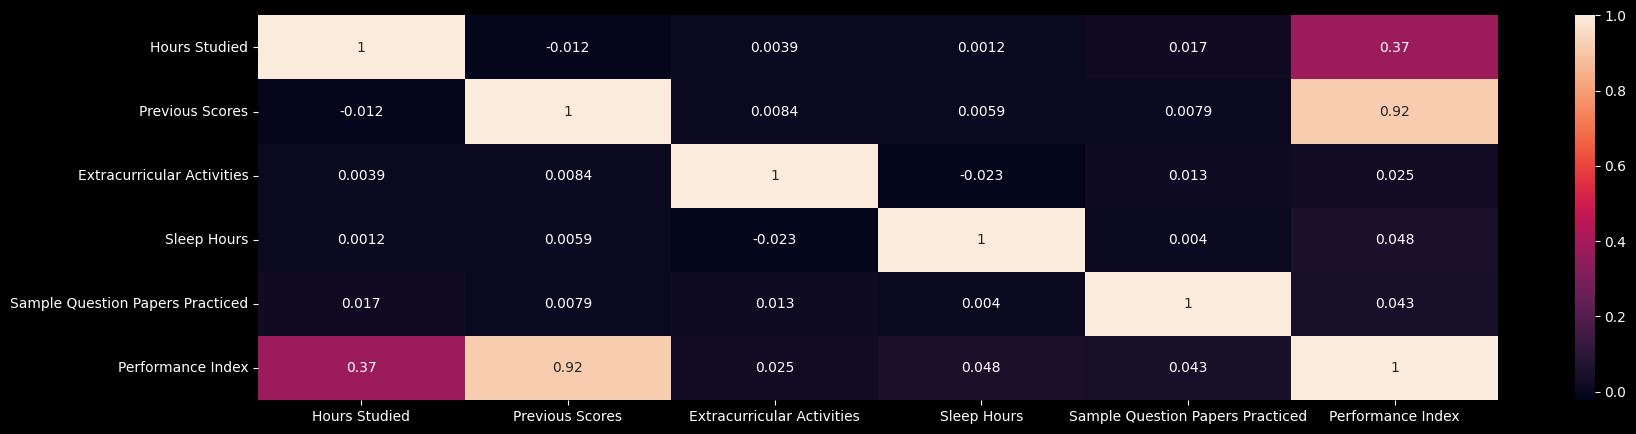

In [19]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Multiple Linear Regression from Scratch using Gradient Descent

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Gradient descent update using separate X and y inputs
def gradient_descent(weights, intercept, X, y, learning_rate):
    N = len(y)
    
    predictions = np.dot(X, weights) + intercept
    errors = y - predictions

    weights_grad = -2 * np.dot(X.T, errors) / N
    intercept_grad = -2 * np.sum(errors) / N

    weights_new = weights - learning_rate * weights_grad
    intercept_new = intercept - learning_rate * intercept_grad

    return weights_new, intercept_new

# Training loop using separate X, y
def main(weights, intercept, X_train, y_train, learning_rate, epochs):
    mse_list = []
    mae_list = []
    
    for i in range(epochs):
        weights, intercept = gradient_descent(weights, intercept, X_train, y_train, learning_rate)

        if i % 100 == 0:
            preds = np.dot(X_train, weights) + intercept
            mse = mean_squared_error(y_train, preds)
            mae = mean_absolute_error(y_train, preds)
            mse_list.append(mse)
            mae_list.append(mae)
            print(f"Epoch {i}: Weights = {weights}, Intercept = {intercept:.4f}, Train MSE = {mse:.4f}, Train MAE = {mae:.4f}")

    return weights, intercept, mse_list, mae_list

# --- Prepare data ---
X_train = xt.values
y_train = yt.values.flatten()  # flatten in case it's a single-column DF/Series

X_test = xte.values
y_test = yte.values.flatten()

# Initialize parameters
weights = np.zeros(X_train.shape[1])
intercept = 0
learning_rate = 0.001
epochs = 10000

# Train
weights_final, intercept_final, mse, mae = main(weights, intercept, X_train, y_train, learning_rate, epochs)

print('\nFinal Weights:', weights_final)
print('Final Intercept:', intercept_final)

Epoch 0: Weights = [0.01442419 0.03521491 0.05507275 0.00184432 0.00146127], Intercept = 0.1106, Train MSE = 3409.9528, Train MAE = 55.1489
Epoch 100: Weights = [1.32292753 3.22322125 4.80219715 0.17443821 0.13032016], Intercept = 9.8878, Train MSE = 2104.0752, Train MAE = 43.0243
Epoch 200: Weights = [2.39847564 5.83267002 8.28529875 0.32430816 0.23008245], Intercept = 17.5257, Train MSE = 1316.1839, Train MAE = 33.6643
Epoch 300: Weights = [ 3.28262719  7.96875495 10.80118686  0.45297984  0.30711975], Intercept = 23.5116, Train MSE = 838.9778, Train MAE = 26.4502
Epoch 400: Weights = [ 4.00951184  9.71751271 12.57826553  0.56234217  0.36644046], Intercept = 28.2213, Train MSE = 548.4255, Train MAE = 20.9311
Epoch 500: Weights = [ 4.60716155 11.149318   13.7922515   0.65442909  0.4119768 ], Intercept = 31.9439, Train MSE = 370.2382, Train MAE = 16.7607
Epoch 600: Weights = [ 5.09860255 12.32173959 14.57828221  0.73127684  0.44681192], Intercept = 34.9028, Train MSE = 259.8659, Train M

# Predicting

In [14]:
# Evaluate on test data
y_pred_test = np.dot(X_test, weights_final) + intercept_final
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2=r2_score(y_test, y_pred_test)
print("\nTest MSE:", mse_test)
print("Test MAE:", mae_test)
print("R2 Score:",r2)


Test MSE: 4.19795076366717
Test MAE: 1.6180314520907855
R2 Score: 0.9885072813245088


# Evaluation Metrics

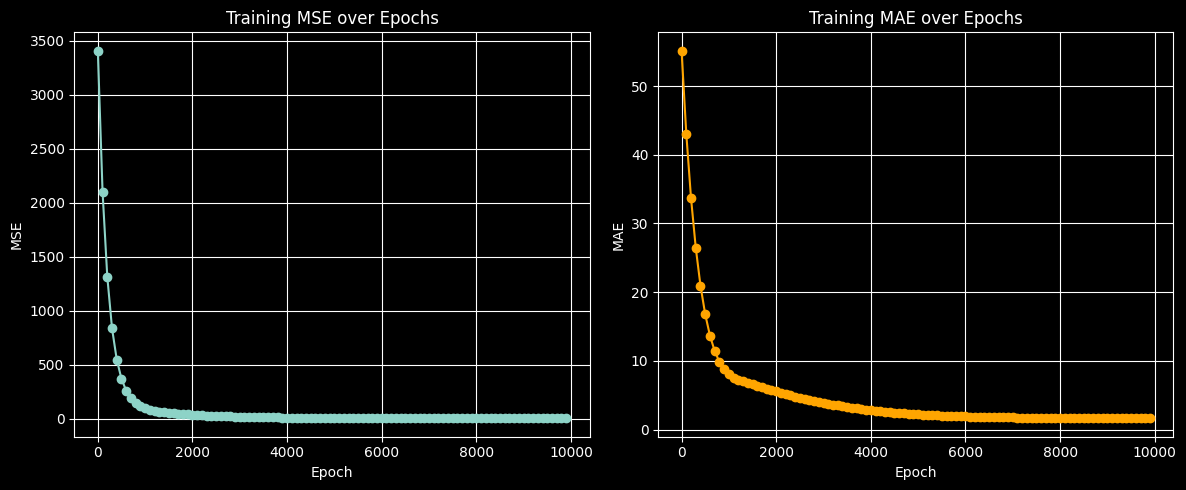

In [15]:
# Plot training loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(0, epochs, 100), mse, marker='o')
plt.title('Training MSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(0, epochs, 100), mae, marker='o', color='orange')
plt.title('Training MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.grid()

plt.tight_layout()
plt.show()

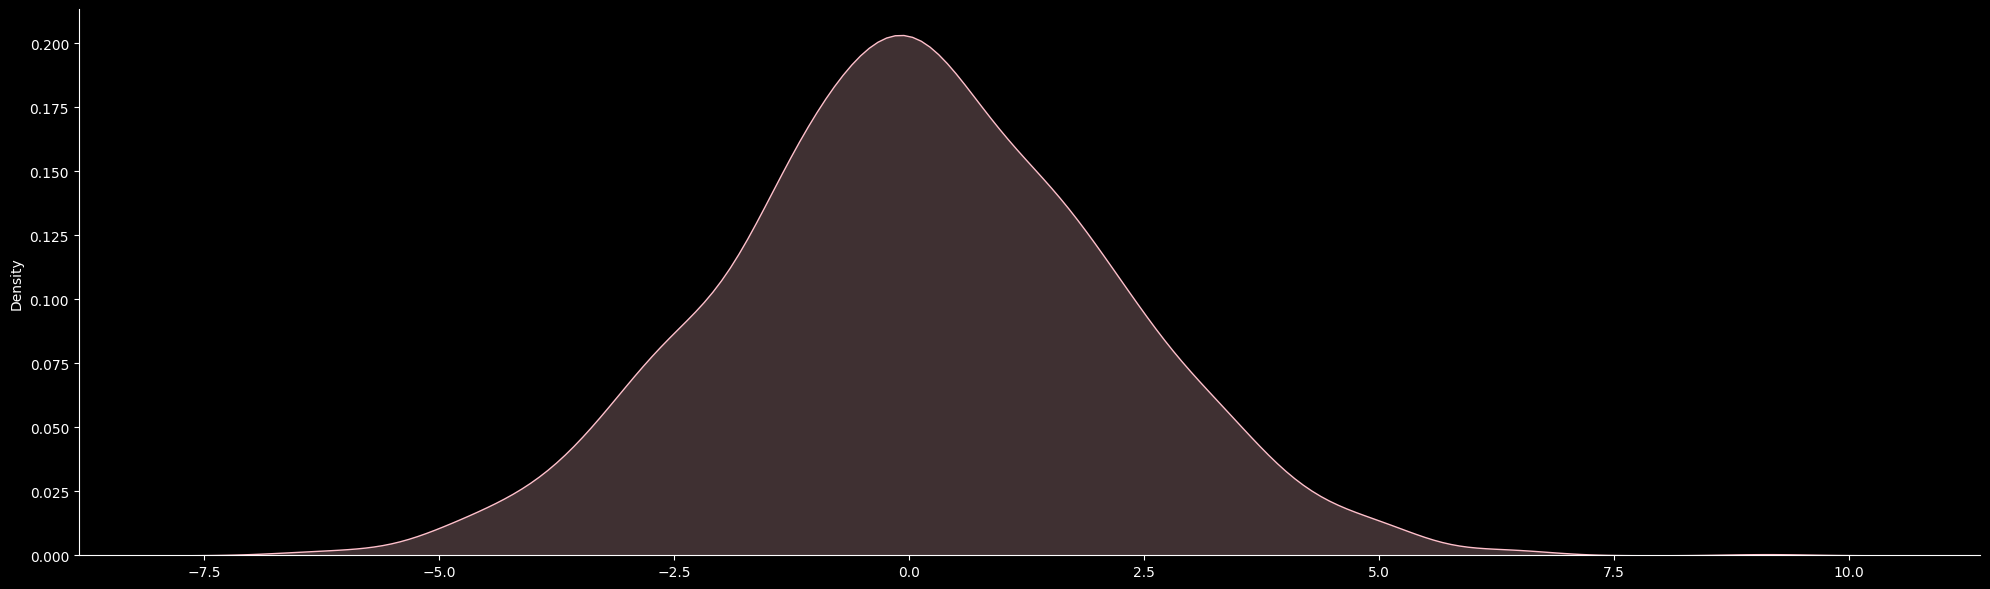

In [16]:
sns.displot(y_test-y_pred_test, kind='kde', fill=True, color='pink', height=6, aspect=20/6)
plt.show()